### 1. Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.datasets import mnist

/home/reza/.local/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
2024-11-24 16:33:11.773937: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-24 16:33:13.894979: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/reza/.local/lib/python3.12/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  

### 2. Loading the MNIST Dataset

In [10]:
(x_train, y_train), _ = mnist.load_data()

### 3. Selecting One Random Image per Digit

In [ ]:
selected_images = []
labels = np.arange(10)

for label in labels:
    indices = np.where(y_train == label)[0]
    random_index = np.random.choice(indices)
    selected_images.append(x_train[random_index])

### 4. Defining the Convolution Function from Scratch

In [ ]:
def convolve(image, kernel, stride=1):
    # Get dimensions
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape
    
    # Calculate output dimensions
    output_height = (image_height - kernel_height) // stride + 1
    output_width = (image_width - kernel_width) // stride + 1
    
    # Initialize the output feature map
    output = np.zeros((output_height, output_width))
    
    # Perform convolution
    for i in range(0, output_height):
        for j in range(0, output_width):
            # Extract the region of interest
            region = image[i*stride:i*stride+kernel_height, j*stride:j*stride+kernel_width]
            # Element-wise multiplication and summation
            output[i, j] = np.sum(region * kernel)
    return output


### 5. Generating Three Random 3×3 Kernels

In [52]:
np.random.seed(0)


kernels = [np.random.randn(3, 3) for _ in range(3)]
# kernels = [np.random.randint(0, 255, [3, 3]) for _ in range(3)]
kernels

[array([[ 1.76405235,  0.40015721,  0.97873798],
        [ 2.2408932 ,  1.86755799, -0.97727788],
        [ 0.95008842, -0.15135721, -0.10321885]]),
 array([[ 0.4105985 ,  0.14404357,  1.45427351],
        [ 0.76103773,  0.12167502,  0.44386323],
        [ 0.33367433,  1.49407907, -0.20515826]]),
 array([[ 0.3130677 , -0.85409574, -2.55298982],
        [ 0.6536186 ,  0.8644362 , -0.74216502],
        [ 2.26975462, -1.45436567,  0.04575852]])]

### 6. Convolving Each Image with Each Kernel

In [53]:
convolved_images = []  # This will be a list of lists
for idx, image in enumerate(selected_images):
    image_convolved_with_kernels = []
    for k_idx, kernel in enumerate(kernels):
        convolved_image = convolve(image, kernel)
        image_convolved_with_kernels.append(convolved_image)
    convolved_images.append(image_convolved_with_kernels)

### 7. Plotting All Results

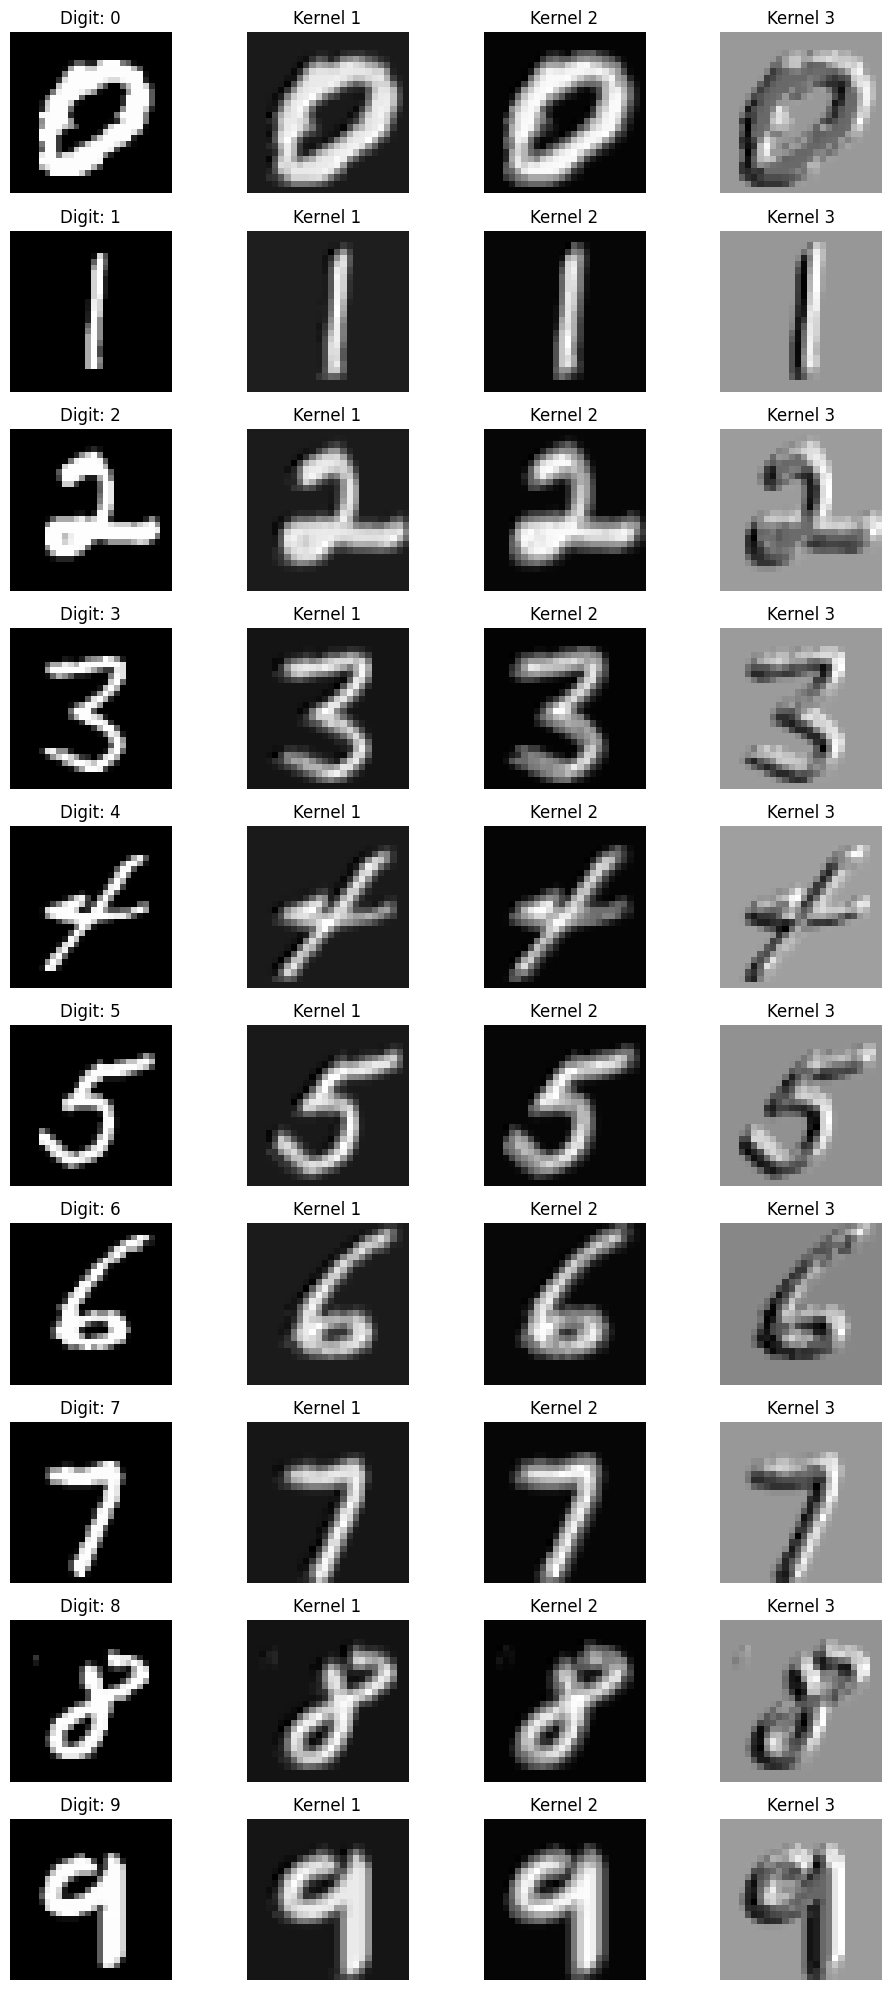

In [54]:
num_digits = len(selected_images)
num_kernels = len(kernels)

fig, axes = plt.subplots(num_digits, num_kernels + 1, figsize=(10, 20))

for i in range(num_digits):
    # Original image
    axes[i, 0].imshow(selected_images[i], cmap='gray')
    axes[i, 0].set_title(f'Digit: {i}')
    axes[i, 0].axis('off')
    
    # Convolved images
    for j in range(num_kernels):
        axes[i, j+1].imshow(convolved_images[i][j], cmap='gray')
        axes[i, j+1].set_title(f'Kernel {j+1}')
        axes[i, j+1].axis('off')

plt.tight_layout()
plt.show()

### 8. Saving Images to a .txt File

In [55]:
filename = "Data/MNIST.txt"

# Check if the file exists; if so, overwrite it
if(os.path.exists(filename)):
    os.remove(filename)

# Save the images as 28x28 matrices in one .txt file
with open(filename, 'w') as f:
    for idx, image in enumerate(selected_images):
        f.write(f'Digit: {idx}\n')
        np.savetxt(f, image, fmt='%d')
        f.write('\n')